#### **Name     : Deep Walke**
#### **Roll No. : BT19CSE122**
#### **Date Of Submission: 16/04/2022**
#### **IVP PROGRAMMING ASSIGNMENT-2**

In [21]:
#importing libraries
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

**Q1. Develop a function to implement Harris corners detection algorithm. Use the function to detect corner 
points in the given corner_test.png image. Compare your function implementation result with built in 
cv2.cornerHarris() / detectHarrisFeatures() function result to test your code.**

In [22]:

# Sobel x-axis filter
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int32")

# Sobel y-axis filter
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int32")

# Gaussian filter
gauss = np.array(([1/16, 2/16, 1/16],[2/16, 4/16, 2/16],[1/16, 2/16, 1/16]), dtype="float64")


def applyfilter(img,filter):
    x=img.shape[0]
    y=img.shape[1]
    filter_size=filter.shape[0]
    
    n=filter_size//2
    
    #initalizing the final image that we will obtain after applying the filter
    imgAfterFilter=np.zeros(img.shape)
    # creating a padded image of the given image and initialised with 0
    paddedImage=np.zeros((x+n*2,y+n*2))
    
    #now assinging the pixes of original image to padded image 
    #such that padded image will be an image which has border of black color(as intialized with zeros).
    for i in range(x):
        for j in range(y):
            paddedImage[n+i][n+j]=img[i][j]
    
    #now traversing through the and applying filter to the padded image 
    for i in range(x):
        for j in range(y):
            imgAfterFilter[i][j]=np.sum(np.multiply(filter, paddedImage[i:i + filter_size, j:j + filter_size]))
    
    return imgAfterFilter



In [23]:

def harris(img, threshold=0.6):

    img_corners = img.copy() # copying image

    # grayscaling (0-1)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

    # applying sobel filter to the image
    dx = applyfilter(img_gray, sobelX) 
    dy = applyfilter(img_gray, sobelY) 
    
    # square of derivatives
    dx2 = np.square(dx)
    dy2 = np.square(dy)
    dxdy = dx * dy  # cross filtering
    
    # gauss filter for all directions (x,y,cross axis)
    # to remove noise
    g_dx2 = applyfilter(dx2, gauss)
    g_dy2 = applyfilter(dy2, gauss)
    g_dxdy = applyfilter(dxdy, gauss)
    
    # Harris Function
    # Sum sqaured difference of derivatives
    # r(harris) = det - k*(trace**2)
    harris = g_dx2 * g_dy2 - np.square(g_dxdy) - 0.12 * np.square(g_dx2 + g_dy2)  
    
    # Normalizing inside (0-1)
    cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)

    # find all points above threshold (nonmax supression line)
    # loc will store coordinates of all points above threshold
    loc = np.where(harris >= threshold)
    
    # drawing filtered points
    for pt in zip(*loc[::-1]):
        cv2.circle(img_corners, pt, 3, (0, 0, 255), -1)

    return img_corners

(Text(0.5, 1.0, 'Harris Corner Output'), ([], []), ([], []))

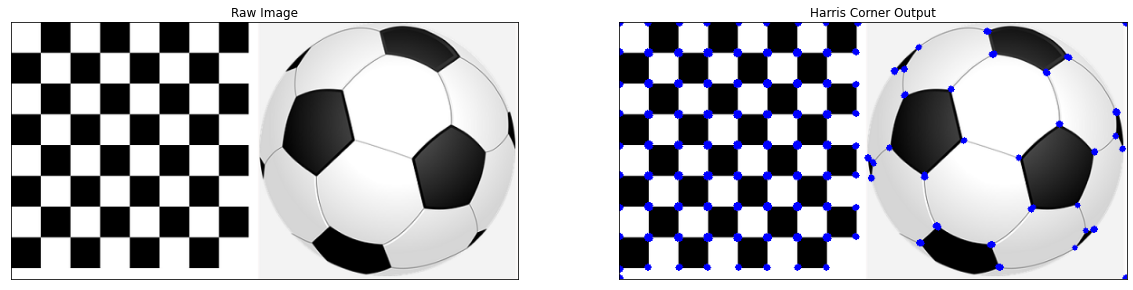

In [24]:
# Q1 main function

img = cv2.imread('corner_test.png')

corners = harris(img,0.55)


plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img)
plt.title("Raw Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(corners)
plt.title("Harris Corner Output"), plt.xticks([]), plt.yticks([])


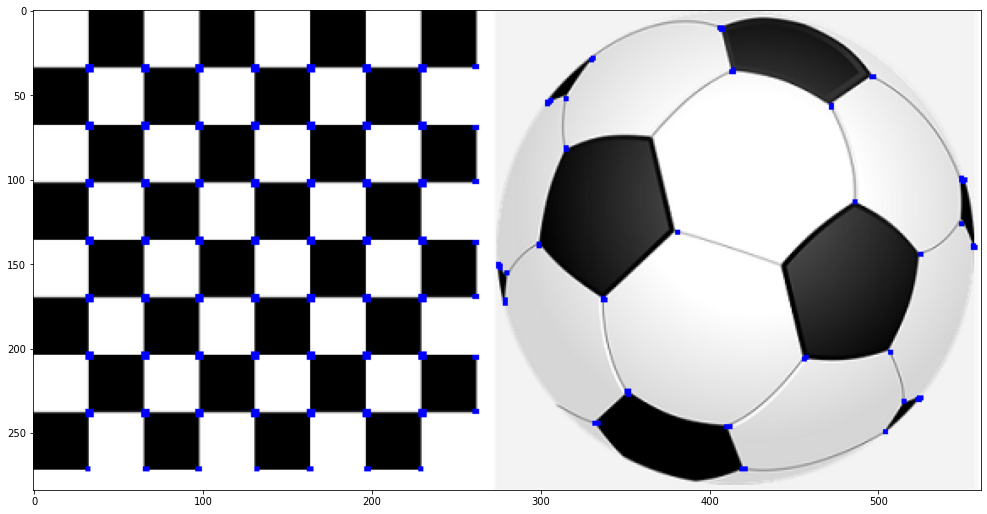

In [25]:
# corner detection using built in harris corner detector
img= cv2.imread('corner_test.png')

# changing img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

w,h,c = img.shape

# Detect corner
dst = cv2.cornerHarris(gray,2,3,0.1)
# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

# threshold for an optimal value 
# varies depending on images
img[dst>0.01*dst.max()]=[0,0,255] 

# displaying the corner points on the image
fig=plt.figure(figsize=(30,30))
plt.gray()
fig.add_subplot(3,1,1)
plt.imshow(img)


**Q2. Implement your own program to detect lines in a given image using the given hough transform algorithm. 
Use roadlane.jpg to test your code. Compare your code output with inbuilt hough line model fitting function.**

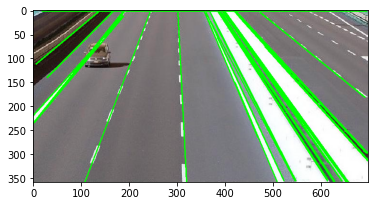

In [26]:
# Q2
image = cv2.imread('roadlane.jpg')
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
 
# Use canny edge detection
edges = cv2.Canny(gray,50,150,apertureSize=3)
 
# Apply HoughLinesP method to
# to directly obtain line end points

lines = cv2.HoughLinesP(edges,1,np.pi/180, threshold=100,minLineLength=1,maxLineGap=100)
 
lines_list=[]
# Iterate over points
for points in lines:
      # Extracted points nested in the list
    x1,y1,x2,y2=points[0]
    # Draw the lines joing the points
    # On the original image
    cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
    # Maintain a simples lookup list for points
    lines_list.append([(x1,y1),(x2,y2)])
     
plt.imshow(image)

**Q3. Write a program to perform robust image matching using RANSAC algorithm and Harris Corner features.
Use FM_img1.jpg and FM_img2.jpg to test the program**

**Q4. Write a program to perform image stitching for two images. Use SIFT features (use builtin library 
function) and homography based Feature Matching technique. Use scene1.jpg and scene2.jpg to test the 
program. NOTE: install "pip install opencv-contrib-python" to use builtin SIFT descriptor.
Note: CV2 SIFT function: cv2.xfeatures2d.SIFT_create()
Matlab SIFT function: detectSIFTFeatures()**


Text(0.5, 1.0, 'stitched image')

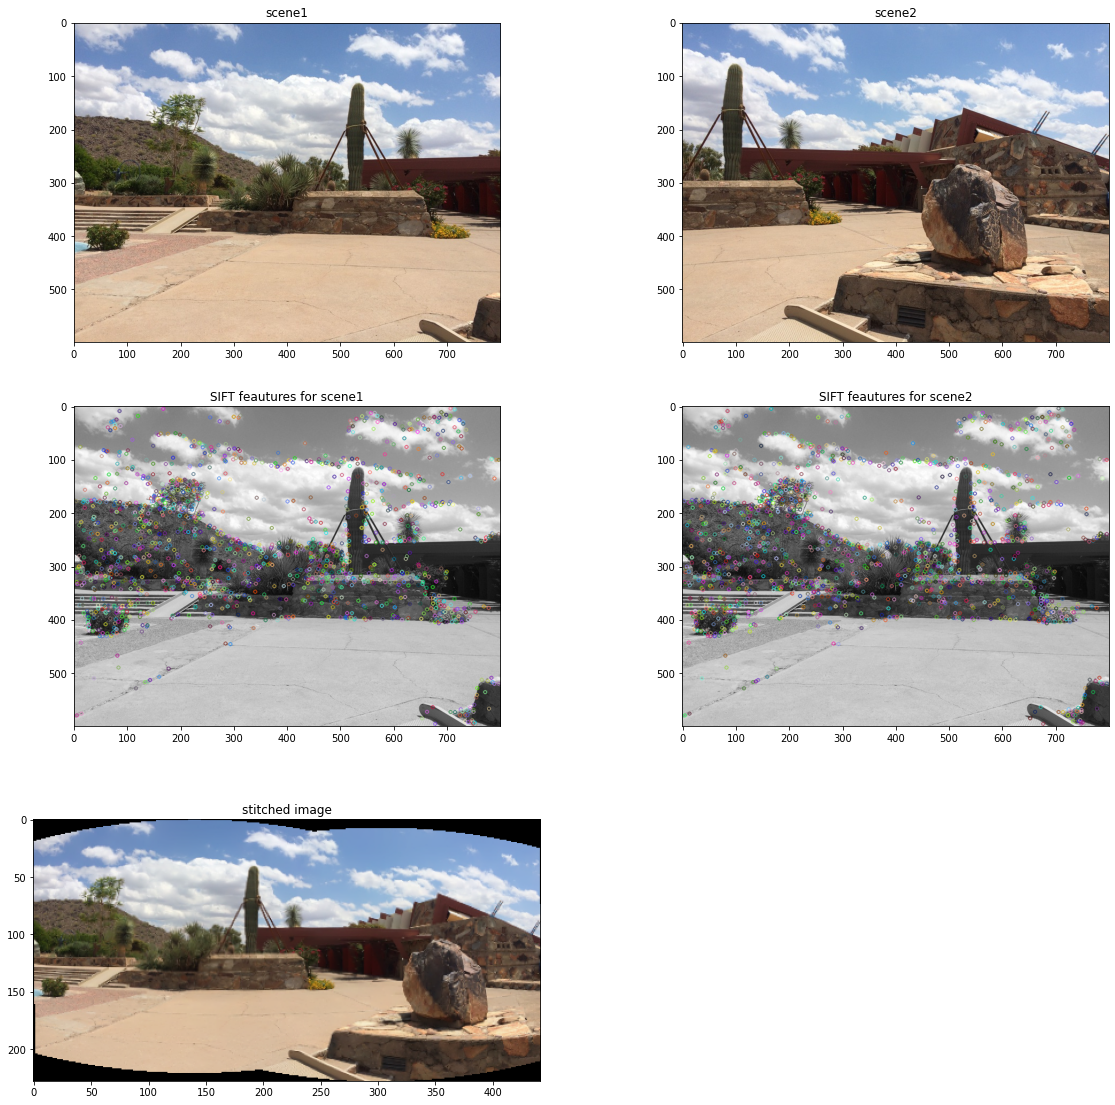

In [27]:
image1 = cv2.imread('scene1.jpg')
image2 = cv2.imread('scene2.jpg')

#list of images to be stitched together
images = []
images.append(image1)
images.append(image2)

# then we are resizing both the images
images[0]=cv2.resize(images[0],(0,0),fx=0.4,fy=0.4)
images[1]=cv2.resize(images[1],(0,0),fx=0.4,fy=0.4)

# displaying the images seperately
fig=plt.figure(figsize=(20,20))
fig.add_subplot(3,2,1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("scene1")
fig.add_subplot(3,2,2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("scene2")

# Detection of key points and descriptors using SIFT
# Applying SIFT detector
gray= cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
sift = cv2.xfeatures2d.SIFT_create() #creating  sift object
keypoints = sift.detect(gray,None) # geting all the keypoints

# Drawing key points on the image and displaying it
image1=cv2.drawKeypoints(gray,keypoints,image1)
fig.add_subplot(3,2,3)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title("SIFT feautures for scene1")

# Drawing key points on the image and displaying it
image2=cv2.drawKeypoints(gray,keypoints,image2)
fig.add_subplot(3,2,4)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title("SIFT feautures for scene2")

# calling the stitch function
stitchy=cv2.Stitcher.create()
(dummy,output)=stitchy.stitch(images)

# displaying the stitched image
fig.add_subplot(3,2,5)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("stitched image") 

**Q5. Write a program to implement Otsu’s algorithm for global threshold-based image segmentation. Use 
Boat_Otsu.png image to test your code.**

Otsu's algorithm implementation thresholding result:  132.978515625


Text(0.5, 1.0, 'Segmented image')

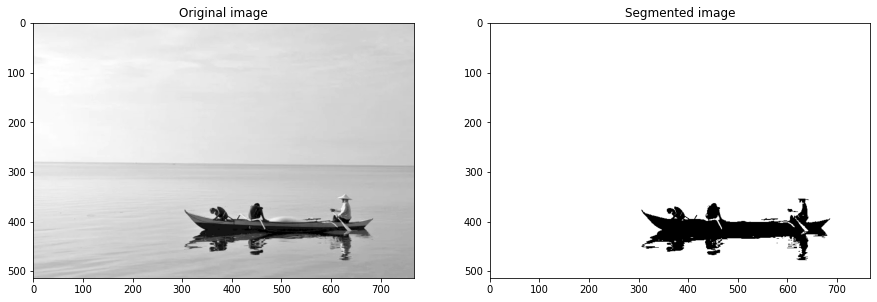

In [28]:
#reading image
image = cv2.imread('Boat_Otsu.png', 0)

original_image = image.copy()

#generating histogram for the image
hist, bin_edges = np.histogram(image, 256)

#normalization of the histogram
hist=np.divide(hist,hist.max())

#each bin's middle value is considered as the pixel value
pixel_values = (bin_edges[:-1] + bin_edges[1:]) / 2

# weights
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

# mean values
mean1 = np.cumsum(hist * pixel_values) / weight1
mean2 = (np.cumsum((hist * pixel_values)[::-1]) / weight2[::-1])[::-1]

# calculating the variance
between_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2

# Maximize the between_class_variance function val
index_of_max_val = np.argmax(between_class_variance)

threshold = pixel_values[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

image[image > threshold]=255
image[image <threshold]=0
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.gray()
plt.imshow(original_image)
plt.title("Original image")
fig.add_subplot(2,2,2)
plt.gray()
plt.imshow(image)
plt.title("Segmented image")

**Q6. Implement a program to detect moving vehicles by using median differencing background subtraction 
technique and mention your observations on the result. Use traffic.3gp video clip to test your code.**

In [ ]:
# Median differencing background subtraction technique
# so here we will have last n frames stored and 
# for the background we will take median of all these n frames
# and subtract the median with the current frame to get foreground

vid = cv2.VideoCapture('traffic.3gp')
# number of frames
n = 4

lastNFrames = []
flag=True
while flag:
    # getting current frame      
    ret, frame = vid.read()
    try:
        # grayscaling (0-1)
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) 
        # adding frames to the list  
        lastNFrames.append(frame)
        # if size become n then we have to pop the oldest frames
        if len(lastNFrames) == n+1:
            lastNFrames.pop(0)
        
        # then we stored last n frames in a numpy array
        # then we got median using .median method
        medianImgs = np.array(lastNFrames)
        medianImg = np.median(medianImgs,axis=0)
        medianImg = medianImg.astype(np.uint8)
        
        # then we got absolute difference of the 
        # median which is the background and current frame
        background_image = cv2.absdiff(frame,medianImg)
        
        a = np.array([255],np.uint8)    # white
        b = np.array([0],np.uint8)      # black

        # thresholding the background image
        forground = np.where(background_image>11,a,b)
        
        # applying Gaussian filter to remove noise
        # kernel  = cv2.getGaussianKernel(5,1)
        kernel  = np.ones((3,3),np.uint8)
        
        # here we are first eroding and then dilating which is basically opening operation
        forground_erode = cv2.erode(forground,kernel,iterations =1)
        forground_dilate = cv2.dilate(forground_erode,kernel,iterations =1)

        # then for masking we are doing bitwise_and operation 
        forground_image =  cv2.bitwise_and(frame,frame,mask = forground)
        # then we are dispalying the foreground video
        cv2.imshow('FOREGROUND_VIDEO',forground_image)
        k = cv2.waitKey(5) & 0xFF
    except:
        flag=False
        sys.exit(0)
    